In [8]:
import os

directory = r'C:\Users\Giin\RO\lab5' 
os.chdir(directory)

# Harris Corner Detection

In [9]:
import numpy as np
import cv2 as cv
filename = 'blox.jpg'
img = cv.imread(filename)
# resize image
img = cv.resize(img, (512,512), interpolation = cv.INTER_NEAREST)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  

gray = np.float32(gray)

dst = cv.cornerHarris(gray,2,3,0.04) 
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# Shi-Tomasi Corner Detecto

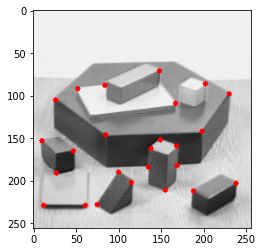

(<matplotlib.image.AxesImage at 0x233ddbd17f0>, None)

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
 
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

# SIFT

In [20]:
import cv2
import numpy as np

img = cv2.imread('home.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp,img)
#If you pass a flag, cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS to it, it will draw a circle with size of keypoint and it will even show its orientation.
#img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('sift_keypoints.jpg',img)
cv2.imshow('SIFT',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

# FAST Features from Accelerated Segment Test)

In [23]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('blox.jpg',0) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
#fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png', img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 431
Total Keypoints without nonmaxSuppression: 431


True

# ORB (Oriented FAST and Rotated BRIEF)

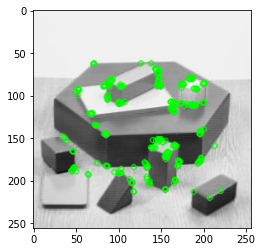

(<matplotlib.image.AxesImage at 0x233801eef10>, None)

In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('blox.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
#img2=cv.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

# Brute-Force Matching with ORB Descriptors

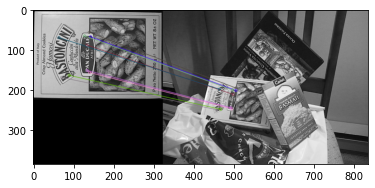

(<matplotlib.image.AxesImage at 0x233805776d0>, None)

In [37]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [ ]:
Brute-Force Matching with SIFT Descriptors and Ratio Test

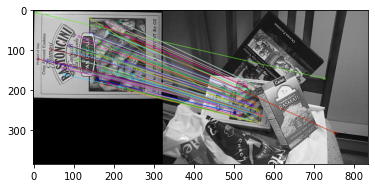

(<matplotlib.image.AxesImage at 0x2338054d4f0>, None)

In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

# FLANN based Matcher

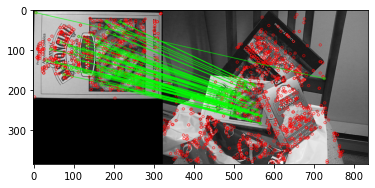

(<matplotlib.image.AxesImage at 0x233802cc790>, None)

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


# zad 1. Porównaj ze sobą inne obrazy jedną z metod dopasowań i porównaj ze sobą niezwiązane obrazy

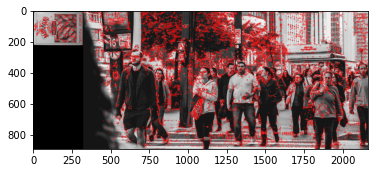

(<matplotlib.image.AxesImage at 0x2338118a100>, None)

In [46]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('people.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.2*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


# zad2. Metoda SIFT - porównaj ze soba obrazy oryginalny i obrócony o 45 i 90 stopni

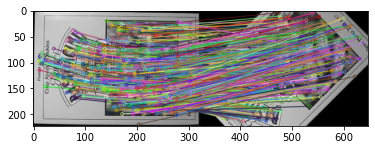

(<matplotlib.image.AxesImage at 0x233804cfbb0>, None)

In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img_rotate = ndimage.rotate(img1, 45, reshape=False)
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img_rotate,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img_rotate,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

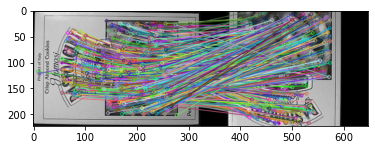

(<matplotlib.image.AxesImage at 0x233800605e0>, None)

In [52]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img_rotate = ndimage.rotate(img1, 90, reshape=False)
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img_rotate,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img_rotate,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

# Oryginaly i przeskalowany 0.25x i 2x 

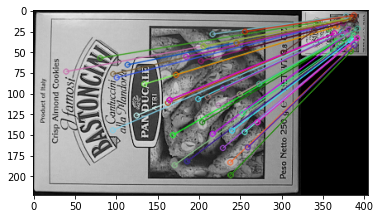

(<matplotlib.image.AxesImage at 0x23381d61280>, None)

In [56]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img_scale =  cv2.resize(img1, (0, 0), fx=0.25, fy=0.25)
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img_scale,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img_scale,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

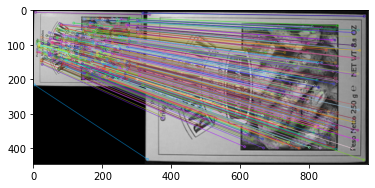

(<matplotlib.image.AxesImage at 0x23380881280>, None)

In [58]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img_scale =  cv2.resize(img1, (0, 0), fx=2, fy=2)
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img_scale,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img_scale,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

# zad3. Metoda ORB porównaj ze sobą obrazy oryginalny i obrócony o 45 i 90 stopni


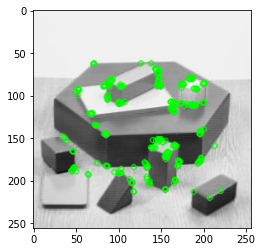

(<matplotlib.image.AxesImage at 0x2da13167e20>, None)

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('blox.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_rotate = ndimage.rotate(img, 45, reshape=False)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
#img2=cv.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

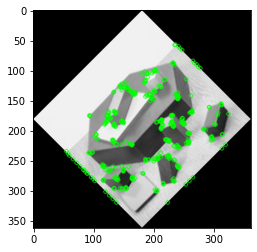

(<matplotlib.image.AxesImage at 0x2da131c49a0>, None)

In [11]:
import numpy as np
import cv2 as cv
from scipy import ndimage
from matplotlib import pyplot as plt

img = cv.imread('blox.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_rotate = ndimage.rotate(img, 45, reshape=True)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img_rotate,None)
# compute the descriptors with ORB
kp, des = orb.compute(img_rotate, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img_rotate, kp, None, color=(0,255,0), flags=0)
#img2=cv.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

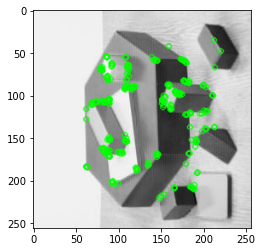

(<matplotlib.image.AxesImage at 0x2da13221af0>, None)

In [12]:
import numpy as np
import cv2 as cv
from scipy import ndimage
from matplotlib import pyplot as plt

img = cv.imread('blox.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_rotate = ndimage.rotate(img, 90, reshape=True)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img_rotate,None)
# compute the descriptors with ORB
kp, des = orb.compute(img_rotate, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img_rotate, kp, None, color=(0,255,0), flags=0)
#img2=cv.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

# Oryginalmny i przeskalowany 0.25x i 2x

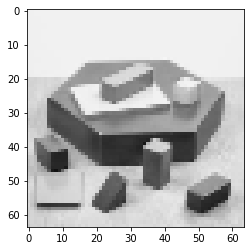

(<matplotlib.image.AxesImage at 0x2da14793340>, None)

In [16]:
import numpy as np
import cv2 as cv
from scipy import ndimage
from matplotlib import pyplot as plt

img = cv.imread('blox.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_scale =  cv.resize(img, (0, 0), fx=0.25, fy=0.25)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img_scale,None)
# compute the descriptors with ORB
kp, des = orb.compute(img_scale, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img_scale, kp, None, color=(0,255,0), flags=0)
#img2=cv.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

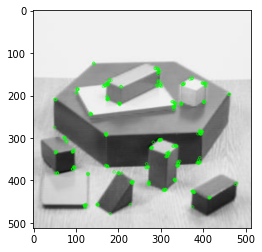

(<matplotlib.image.AxesImage at 0x2da13277f70>, None)

In [15]:
import numpy as np
import cv2 as cv
from scipy import ndimage
from matplotlib import pyplot as plt

img = cv.imread('blox.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_scale =  cv.resize(img, (0, 0), fx=2, fy=2)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img_scale,None)
# compute the descriptors with ORB
kp, des = orb.compute(img_scale, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img_scale, kp, None, color=(0,255,0), flags=0)
#img2=cv.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()